# Honey, they're Disappearing!
## An analysis of bee colony loss from 2010-2016 in the United States

### Capstone Analytic Report and Research Proposal -- Thinkful
### HC 2019-02-16

With the rise in uncontrolled bee deterrents such as insecticides, mites, and other pathogenic diseases, beekeeping has become unpopular over the past few decades in the US(Ellis et al., 2010; Potts et al., 2010; Morse, 2000). This trend is demonstrated by data collected from 2010-2016 on managed honey bee (Apis mellifera L.) colonies. Decline in honey beekeeping not only impacts agricultural communities economically, but also affects the pollination of many essential plants (Neumann & Carreck, 2010). The negative impacts of colony decline on the community and the pressure it places on the ecosystem have pushed the issue to the forefront of public attention, now popularly termed "Colony Collapse Disorder" (CCD)*. However, with the popularity of the problem, there has been widespread misinformation about the causes and effects of bee colony loss (Neumann & Carreck, 2010). However, a study done in 2009 by vanEngelsdorp and Meixner have shown that colony loss is not an uncommon occurence. This historical decline was found to be caused by a viral infection, named “Isle of Wight Disease” (Bailey and Ball, 1991; Bailey, 2002).

Though a closer examination of this [dataset](https://bip2.beeinformed.org/hive-scales/config/about) provided by The Bee Informed Partnership (BIP) may not explain why bee colonies have been declining, it can help us better understand th relationship between beekeeping and bee colony health. 

(The BIP was initially funded by the United States Department of Agriculture (USDA) and the National Institute of Food and Agriculture (NIFA) but has now become non-for-profit organization that works with beekeepers nationally to promote the health of bees.)

**Note: CCD is a term only used for HONEY bees (Genus: Apis). It does not apply to other bees such as bumblebees (Genus: Bombus), sweat bees (Genus: Lasioglossum), and many others.*

In [99]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import pylab
from scipy import stats
from sklearn import datasets, linear_model
import mpl_toolkits
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
#from mpl_toolkits.basemap import Basemap  

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [5]:
#import dataset
df=pd.read_csv('Bee_Colony_Loss.csv')

### Metadata:
   - YEAR: year of bee survey
   - SEASON: season survey was taken (all were annual surveys)
   - STATE: state that bee survey was taken
   - TOTAL_ANN_LOSS: estimate of the number of colonies lost by the whole beekeeping population in that state
   - BEEKEEPERS: number of beekeepers
   - STATE_BEEKEEPERS: percent of beekeepers who do NOT keep bees in more than one state
   - COLONIES: number of colonies
   - STATE_COLONIES: percent of colonies that span only one state

In [6]:
#dataset column names
list(df)

['YEAR',
 'SEASON',
 'STATE',
 'TOTAL_ANN_LOSS',
 'BEEKEEPERS',
 'STATE_BEEKEEPERS',
 'COLONIES',
 'STATE_COLONIES']

In [13]:
df1 = df[['YEAR','STATE','BEEKEEPERS','COLONIES','TOTAL_ANN_LOSS']]
df2=df1.groupby('STATE').mean().reset_index()

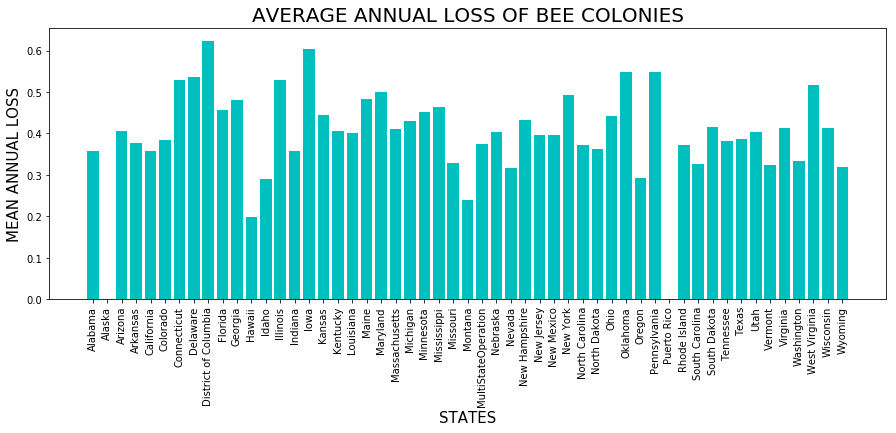

In [14]:
st=df2['STATE']
loss=df2['TOTAL_ANN_LOSS']

plt.figure(figsize=(15, 5))
plt.bar(st, loss, align='center', alpha=1, color='c')
plt.xticks(rotation=90)
plt.xlabel('STATES', size=15)
plt.ylabel('MEAN ANNUAL LOSS', size=15)
plt.title('AVERAGE ANNUAL LOSS OF BEE COLONIES', size=20)
plt.show()

[[0.03424543 0.00235437 0.00810271 0.04479425 0.2005804  0.13285394
  0.05366137 0.02232068 0.00779695 0.08974138 0.08133291 0.03669154
  0.03409255 0.10487664 0.11466105 0.04464137 0.02889458 0.05641324
  0.01788712 0.09264613 0.15058818 0.12964343 0.1964526  0.074759
  0.01406509 0.08928274 0.02170916 0.14019224 0.01238339 0.00794983
  0.0484634  0.09050579 0.01574678 0.14737767 0.27105872 0.0238495
  0.24185838 0.02920035 0.1307136  0.55419508 0.00107017 0.02079187
  0.08087426 0.01039594 0.07430036 0.08607223 0.06680917 0.05243832
  0.47209776 0.10716986 0.05121527 0.11190919 0.01284204]]


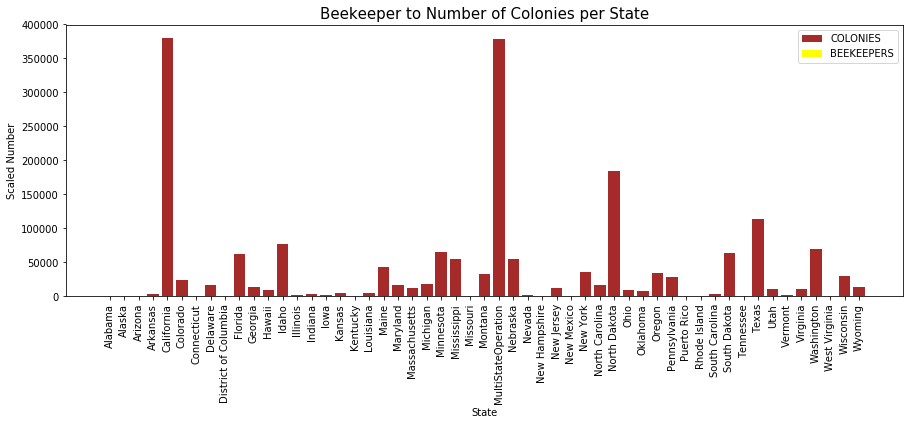

In [95]:
###Normalizeing/Scaling data
st=df2['STATE']
col=df2['COLONIES']
bk=df2['BEEKEEPERS']

col_norm=preprocessing.normalize([col])
col_norm=col_norm.tolist()
bk_norm=preprocessing.normalize([bk])
print(bk_norm)
plt.figure(figsize=(15, 5))
p1 = plt.bar(st, col, color='brown')
p2 = plt.bar(st, bk, color='yellow')
plt.xticks(rotation=90)
plt.ylabel('Scaled Number', size=10)
plt.xlabel('State', size=10)
plt.title('Beekeeper to Number of Colonies per State', size=15)
plt.legend((p1, p2), ('COLONIES', 'BEEKEEPERS'))

plt.show()

In [16]:
# Year with most loss
df_yr=df1.groupby('YEAR').mean()['TOTAL_ANN_LOSS'].reset_index()
maxx=max(df_yr['TOTAL_ANN_LOSS'])
print(df_yr)
print(df_yr['TOTAL_ANN_LOSS'] == maxx)

   YEAR  TOTAL_ANN_LOSS
0  2010        0.410000
1  2011        0.342708
2  2012        0.439600
3  2013        0.403333
4  2014        0.446600
5  2015        0.424510
6  2016        0.414902
0    False
1    False
2    False
3    False
4     True
5    False
6    False
Name: TOTAL_ANN_LOSS, dtype: bool


In [78]:
#groupby year -- convert year ndarray into list
df_yr2=df1.groupby('YEAR').mean()[['COLONIES','BEEKEEPERS']].reset_index()
yr=np.unique(df_yr2['YEAR'])
yr=yr.tolist()

[2010, 2011, 2012, 2013, 2014, 2015, 2016]


In [97]:
st=df2['STATE']
col_yr=df_yr2['COLONIES']
bk_yr=df_yr2['BEEKEEPERS']

norm_colyr=preprocessing.normalize([col_yr])
norm_colyr=norm_colyr.tolist()
#norm_colyr=str(norm_colyr)
norm_colyr_=[s.split(', ') for s in norm_colyr]
#print(len(norm_colyr_))


norm_bkyr=preprocessing.normalize([bk_yr])
norm_bkyr=norm_bkyr.tolist()

new_df=pd.DataFrame(index=yr)
new_df['colonies']=[norm_colyr]
new_df['beekeepers']=[norm_bkyr]
new_df

#plt.figure(figsize=(15, 5))
#p1 = plt.bar(yr, norm_colyr, color='brown')
#p2 = plt.bar(yr, norm_bkyr, color='yellow')
#plt.xticks(rotation=90)
#plt.ylabel('Scaled Number', size=10)
#plt.xlabel('State', size=10)
#plt.title('Beekeeper to Number of Colonies per YEAR', size=15)
#plt.legend((p1, p2), ('COLONIES', 'BEEKEEPERS'))

#plt.show()

AttributeError: 'list' object has no attribute 'split'

### References

BAILEY, L (2002) The Isle of Wight Disease. Central Association of Bee-Keepers; Poole, UK. 11 pp.

BAILEY, L; BALL, B V (1991) Honey bee pathology. Academic Press; London, UK. 193 pp.

ELLIS, J D; EVANS, J D; PETTIS J S (2010). Colony losses, managed colony population decline and Colony Collapse Disorder in the United States. Journal of Apicultural Research 49(1): 134-136.DOI: 10.3896/IBRA.1.49.1.30

MORSE R A, CALDERONE N W (2000). The value of honey bees as pollinators of U.S. crops in 2000. Bee Culture 128: 1–15.

NEUMANN, P & CARRECK, N L (2010). Honey bee colony losses, Journal of Apicultural Research, 49:1, 1-6, DOI: 10.3896/IBRA.1.49.1.01: 2078-6913

POTTS, S G; ROBERTS, S P M; DEAN, R; MARRIS, G; BROWN, M A; JONES, H R; NEUMANN, P; SETTELE, J (2010) Declines of managed honey bees and beekeepers in Europe. Journal of Apicultural Research 49(1): 15-22. DOI:10.3896/IBRA.1.49.1.02

VANENGELSDORP, D; MEIXNER, M D (2009) A historical review of managed honey bee populations in Europe and the United States and the factors that may affect them. Journal of Invertebrate Pathology (in press). DOI 10.1016/j.jip.2009.06.011 VEJSNÆS, F; KRYGER, P (2010). Factors involved in the recent